Data Loading & Validation
Comprehensive Data Quality Assessment

Objective: Load all datasets, validate data quality, and identify immediate issues.

Key Insights to Discover:
1. Class imbalance severity
2. Data type issues
3. Missing values
4. Outliers and anomalies
5. Immediate fraud patterns from YOUR data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import json
import os
from pathlib import Path
import sys

# Set professional styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Add src to path for custom modules
sys.path.append(str(Path.cwd().parent / "src"))

: 

In [ ]:
# Get the current working directory
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

# Construct absolute paths
base_path = "D:/10 acadamy/fraud-detection-ml-system/"  # Adjust as needed

fraud_path = os.path.join(base_path, "data/processed/fraud_data_processed_latest.csv")
credit_path = os.path.join(base_path, "data/processed/creditcard_data_processed_latest.csv")
ip_path = os.path.join(base_path, "data/processed/ip_country_data_processed_latest.csv")

# Load the data
fraud_df = pd.read_csv(fraud_path)
credit_df = pd.read_csv(credit_path)
ip_df = pd.read_csv(ip_path)

Current directory: d:\10 acadamy\fraud-detection-ml-system\notebooks\Data_Anlysis_Processing


In [ ]:
print("="*80)
print("📊 DATASET OVERVIEW")
print("="*80)

# Fraud Data Overview
print("\n🔍 FRAUD DATA (E-commerce Transactions)")
print("-"*40)
print(f"Shape: {fraud_df.shape}")
print(f"\nColumns: {list(fraud_df.columns)}")
print(f"\nData Types:\n{fraud_df.dtypes}")

# Check if datetime columns exist
if 'signup_time' in fraud_df.columns and 'purchase_time' in fraud_df.columns:
    # Convert to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(fraud_df['signup_time']):
        fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
    if not pd.api.types.is_datetime64_any_dtype(fraud_df['purchase_time']):
        fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
    
    # Find immediate purchases
    immediate_purchases = fraud_df[fraud_df['signup_time'] == fraud_df['purchase_time']]
    print(f"\n🚨 Found {len(immediate_purchases)} transactions made INSTANTLY after signup!")
    
    if len(immediate_purchases) > 0:
        print("\nImmediate purchase details:")
        for idx, row in immediate_purchases.head().iterrows():
            fraud_flag = "🚩 FRAUD" if row['class'] == 1 else "✅ Legitimate"
            print(f"  User {row['user_id']}: {fraud_flag}, Amount: ${row['purchase_value']:.2f}, "
                  f"Browser: {row['browser']}, Age: {row['age']}")
else:
    print("⚠️ Datetime columns not found in expected format")

print("\nFirst 5 rows:")
display(fraud_df.head(5))

📊 DATASET OVERVIEW

🔍 FRAUD DATA (E-commerce Transactions)
----------------------------------------
Shape: (151112, 11)

Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

Data Types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

🚨 Found 0 transactions made INSTANTLY after signup!

First 5 rows:


user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

In [ ]:
# Credit Card Data Overview
print("\n💳 CREDIT CARD DATA")
print("-"*40)
print(f"Shape: {credit_df.shape}")
print(f"\nColumns: {list(credit_df.columns)}")
print(f"\nV Features (PCA components): V1 to V28")

# Check class column name
class_column = 'Class' if 'Class' in credit_df.columns else 'class' if 'class' in credit_df.columns else None

if class_column:
    class_dist = credit_df[class_column].value_counts()
    print(f"\nClass distribution:")
    print(f"  Legitimate: {class_dist.get(0, 0):,} ({class_dist.get(0, 0)/len(credit_df)*100:.2f}%)")
    print(f"  Fraud: {class_dist.get(1, 0):,} ({class_dist.get(1, 0)/len(credit_df)*100:.2f}%)")
else:
    print("⚠️ Class column not found in credit card data")

# IP Country Mapping Overview
print("\n🌍 IP TO COUNTRY MAPPING DATA")
print("-"*40)
print(f"Shape: {ip_df.shape}")
print(f"\nColumns: {list(ip_df.columns)}")

# Check IP column names
ip_columns = [col for col in ip_df.columns if 'ip' in col.lower()]
if ip_columns:
    print(f"\nIP Range Statistics:")
    lower_col = next((col for col in ip_df.columns if 'lower' in col.lower()), ip_columns[0])
    upper_col = next((col for col in ip_df.columns if 'upper' in col.lower()), ip_columns[1] if len(ip_columns) > 1 else ip_columns[0])
    
    print(f"  Min IP: {ip_df[lower_col].min():,}")
    print(f"  Max IP: {ip_df[upper_col].max():,}")
    print(f"  Unique countries: {ip_df['country'].nunique()}")

print("\nSample IP ranges:")
display(ip_df.head(5))


💳 CREDIT CARD DATA
----------------------------------------
Shape: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

V Features (PCA components): V1 to V28

Class distribution:
  Legitimate: 284,315 (99.83%)
  Fraud: 492 (0.17%)

🌍 IP TO COUNTRY MAPPING DATA
----------------------------------------
Shape: (138846, 3)

Columns: ['lower_bound_ip_address', 'upper_bound_ip_address', 'country']

IP Range Statistics:
  Min IP: 16,777,216.0
  Max IP: 3,758,096,383
  Unique countries: 235

Sample IP ranges:


lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [ ]:
# Create comprehensive visualization dashboard
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Fraud Data Class Distribution', 
                    'Credit Card Class Distribution',
                    'Missing Values Heatmap (Fraud Data)',
                    'Age Distribution with Outliers',
                    'Purchase Value Distribution',
                    'Time Since Signup Analysis'),
    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'heatmap'}],
           [{'type': 'box'}, {'type': 'histogram'}, {'type': 'scatter'}]],
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# 1. Fraud Data Class Distribution
if 'class' in fraud_df.columns:
    fraud_counts = fraud_df['class'].value_counts()
    fig.add_trace(
        go.Pie(labels=['Legitimate', 'Fraud'], 
               values=fraud_counts.values,
               hole=0.4,
               marker_colors=['#2ECC71', '#E74C3C'],
               textinfo='percent+label',
               showlegend=False),
        row=1, col=1
    )
else:
    fig.add_trace(go.Scatter(x=[0], y=[0], mode='text', text=['Class column not found']), row=1, col=1)

# 2. Credit Card Class Distribution
if class_column in credit_df.columns:
    credit_counts = credit_df[class_column].value_counts()
    fig.add_trace(
        go.Pie(labels=['Legitimate', 'Fraud'], 
               values=credit_counts.values,
               hole=0.4,
               marker_colors=['#2ECC71', '#E74C3C'],
               textinfo='percent+label',
               showlegend=False),
        row=1, col=2
    )
else:
    fig.add_trace(go.Scatter(x=[0], y=[0], mode='text', text=['Class column not found']), row=1, col=2)

# 3. Missing Values Heatmap
missing_matrix = fraud_df.isnull().astype(int)
fig.add_trace(
    go.Heatmap(z=missing_matrix.values,
               x=missing_matrix.columns,
               y=[f'Row {i}' for i in range(len(missing_matrix))],
               colorscale='Reds',
               showscale=True,
               colorbar_title="Missing"),
    row=1, col=3
)

# 4. Age Distribution with Outliers
if 'age' in fraud_df.columns:
    fig.add_trace(
        go.Box(y=fraud_df['age'],
               name='Age',
               marker_color='#3498DB',
               boxmean=True),
        row=2, col=1
    )

# 5. Purchase Value Distribution
if 'purchase_value' in fraud_df.columns:
    fig.add_trace(
        go.Histogram(x=fraud_df['purchase_value'],
                     nbinsx=50,
                     marker_color='#9B59B6',
                     name='Purchase Value'),
        row=2, col=2
    )

# 6. Time Since Signup Analysis
if 'signup_time' in fraud_df.columns and 'purchase_time' in fraud_df.columns:
    fraud_df['time_since_signup_hours'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600
    
    fig.add_trace(
        go.Scatter(x=fraud_df['time_since_signup_hours'],
                   y=fraud_df['purchase_value'],
                   mode='markers',
                   marker=dict(
                       size=8,
                       color=fraud_df['class'] if 'class' in fraud_df.columns else 0,
                       colorscale=['#2ECC71', '#E74C3C'],
                       showscale=True,
                       colorbar=dict(title="Fraud")
                   ),
                   name='Time vs Amount'),
        row=2, col=3
    )

# Update layout
fig.update_layout(height=800, 
                  showlegend=False,
                  title_text="📊 Data Quality Dashboard - Initial Assessment",
                  title_font_size=20,
                  title_x=0.5)

fig.show()

In [ ]:
# First, define the DataValidator class
import pandas as pd
import numpy as np
from datetime import datetime
from dataclasses import dataclass
from typing import List, Dict, Any

@dataclass
class ValidationIssue:
    """Represents a data validation issue."""
    severity: str  # 'critical', 'warning', 'info'
    column: str
    description: str
    recommendation: str
    count: int = 0
    percentage: float = 0.0

@dataclass
class ValidationResult:
    """Container for validation results."""
    is_valid: bool
    issues: List[ValidationIssue]
    recommendations: List[str]
    summary: Dict[str, Any]
    data_quality_score: float = 0.0

class DataValidator:
    """Validates data quality and consistency."""
    
    def __init__(self, config_path: str = None):
        """Initialize validator with optional configuration."""
        self.config = {}  # Simplified - you can load from config_path if needed
        self.issues = []
        
    def validate_fraud_data(self, df: pd.DataFrame) -> ValidationResult:
        """Validate fraud detection dataset."""
        issues = []
        recommendations = []
        summary = {}
        
        # 1. Check for missing values
        missing_cols = df.columns[df.isnull().any()].tolist()
        if missing_cols:
            for col in missing_cols:
                missing_count = df[col].isnull().sum()
                missing_pct = (missing_count / len(df)) * 100
                severity = 'critical' if missing_pct > 10 else 'warning'
                issues.append(ValidationIssue(
                    severity=severity,
                    column=col,
                    description=f"Missing values found: {missing_count} ({missing_pct:.2f}%)",
                    recommendation="Consider imputation or removal",
                    count=missing_count,
                    percentage=missing_pct
                ))
        
        # 2. Check for duplicates
        duplicate_count = df.duplicated().sum()
        if duplicate_count > 0:
            duplicate_pct = (duplicate_count / len(df)) * 100
            severity = 'critical' if duplicate_pct > 5 else 'warning'
            issues.append(ValidationIssue(
                severity=severity,
                column='all',
                description=f"Duplicate rows found: {duplicate_count} ({duplicate_pct:.2f}%)",
                recommendation="Remove duplicate rows",
                count=duplicate_count,
                percentage=duplicate_pct
            ))
        
        # 3. Check class distribution (if class column exists)
        if 'class' in df.columns:
            class_distribution = df['class'].value_counts(normalize=True)
            summary['class_distribution'] = class_distribution.to_dict()
            
            # Check for extreme class imbalance
            if len(class_distribution) > 0:
                fraud_ratio = class_distribution.get(1, 0)
                if fraud_ratio < 0.01:  # Less than 1% fraud
                    issues.append(ValidationIssue(
                        severity='warning',
                        column='class',
                        description=f"Extreme class imbalance: {fraud_ratio:.2%} fraud cases",
                        recommendation="Consider sampling techniques or anomaly detection methods",
                        percentage=fraud_ratio * 100
                    ))
        
        # 4. Generate summary statistics
        summary.update({
            'rows': len(df),
            'columns': len(df.columns),
            'missing_values': df.isnull().sum().sum(),
            'duplicates': duplicate_count,
            'validation_time': datetime.now().isoformat()
        })
        
        # 5. Calculate data quality score
        data_quality_score = self._calculate_data_quality_score(issues, df)
        
        # 6. Generate recommendations
        if missing_cols:
            recommendations.append("Consider imputing missing values or removing columns with high missing rates")
        if duplicate_count > 0:
            recommendations.append("Remove duplicate records to avoid bias")
        if any(issue.severity == 'critical' for issue in issues):
            recommendations.append("Address critical issues before proceeding with modeling")
        
        # Overall validation status
        is_valid = not any(issue.severity == 'critical' for issue in issues)
        
        return ValidationResult(
            is_valid=is_valid,
            issues=issues,
            recommendations=recommendations,
            summary=summary,
            data_quality_score=data_quality_score
        )
    
    def _calculate_data_quality_score(self, issues: List[ValidationIssue], df: pd.DataFrame) -> float:
        """Calculate a data quality score (0-100)."""
        if len(df) == 0:
            return 0.0
        
        base_score = 100.0
        
        # Deduct points based on issues
        for issue in issues:
            if issue.severity == 'critical':
                base_score -= issue.percentage * 0.5  # More weight for critical issues
            elif issue.severity == 'warning':
                base_score -= issue.percentage * 0.2
            else:  # info
                base_score -= issue.percentage * 0.05
        
        # Ensure score is between 0 and 100
        return max(0.0, min(100.0, base_score))

# NOW initialize validator (assuming config_path is defined or pass None)
config_path = None  # or your actual config path
validator = DataValidator(config_path)

# Validate fraud data
print("="*80)
print("🔍 FRAUD DATA VALIDATION REPORT")
print("="*80)

fraud_result = validator.validate_fraud_data(fraud_df)

print(f"\n✅ Validation Status: {'PASS' if fraud_result.is_valid else 'FAIL'}")
print(f"📋 Issues Found: {len(fraud_result.issues)}")

if hasattr(validator, '_calculate_data_quality_score'):
    quality_score = validator._calculate_data_quality_score(fraud_result.issues, fraud_df)
    print(f"🎯 Data Quality Score: {quality_score}/100")
elif hasattr(fraud_result, 'data_quality_score'):
    print(f"🎯 Data Quality Score: {fraud_result.data_quality_score}/100")

if fraud_result.issues:
    print("\n🚨 Issues Identified:")
    for i, issue in enumerate(fraud_result.issues[:10], 1):  # Show first 10 issues
        print(f"  {i}. {issue}")
    if len(fraud_result.issues) > 10:
        print(f"  ... and {len(fraud_result.issues) - 10} more issues")

if fraud_result.recommendations:
    print("\n💡 Recommendations:")
    for i, rec in enumerate(fraud_result.recommendations[:5], 1):  # Show first 5 recommendations
        print(f"  {i}. {rec}")

🔍 FRAUD DATA VALIDATION REPORT

✅ Validation Status: PASS
📋 Issues Found: 0
🎯 Data Quality Score: 100.0/100


In [ ]:
# Validate credit card data - use the existing validate_fraud_data method
print("\n" + "="*80)
print("🔍 CREDIT CARD DATA VALIDATION REPORT")
print("="*80)

# Use the validate_fraud_data method instead (it's generic)
credit_result = validator.validate_fraud_data(credit_df)

print(f"\n✅ Validation Status: {'PASS' if credit_result.is_valid else 'FAIL'}")
print(f"📋 Issues Found: {len(credit_result.issues)}")

if hasattr(validator, '_calculate_data_quality_score'):
    quality_score = validator._calculate_data_quality_score(credit_result.issues, credit_df)
    print(f"🎯 Data Quality Score: {quality_score}/100")
elif hasattr(credit_result, 'data_quality_score'):
    print(f"🎯 Data Quality Score: {credit_result.data_quality_score}/100")

if credit_result.issues:
    print("\n🚨 Issues Identified:")
    for i, issue in enumerate(credit_result.issues[:10], 1):  # Show first 10 issues
        print(f"  {i}. {issue}")
    if len(credit_result.issues) > 10:
        print(f"  ... and {len(credit_result.issues) - 10} more issues")

if credit_result.recommendations:
    print("\n💡 Recommendations:")
    for i, rec in enumerate(credit_result.recommendations[:5], 1):  # Show first 5 recommendations
        print(f"  {i}. {rec}")

# Generate comprehensive report manually (since generate_validation_report doesn't exist)
print("\n📊 COMPREHENSIVE VALIDATION SUMMARY")
print("-"*40)

total_issues = len(fraud_result.issues) + len(credit_result.issues)
fraud_score = fraud_result.data_quality_score if hasattr(fraud_result, 'data_quality_score') else 0
credit_score = credit_result.data_quality_score if hasattr(credit_result, 'data_quality_score') else 0
overall_score = (fraud_score + credit_score) / 2
overall_status = "PASS" if fraud_result.is_valid and credit_result.is_valid else "FAIL"

print(f"Total Issues: {total_issues}")
print(f"Overall Status: {overall_status}")
print(f"Overall Data Quality Score: {overall_score:.1f}/100")

# Collect critical issues from both datasets
critical_issues = []
for result, dataset_name in [(fraud_result, "Fraud Data"), (credit_result, "Credit Card Data")]:
    for issue in result.issues:
        if issue.severity == 'critical':
            critical_issues.append(f"[{dataset_name}] {issue.column}: {issue.description}")

if critical_issues:
    print("\n🚨 CRITICAL ISSUES NEEDING IMMEDIATE ATTENTION:")
    for i, issue in enumerate(critical_issues[:5], 1):
        print(f"  {i}. {issue}")
    if len(critical_issues) > 5:
        print(f"  ... and {len(critical_issues) - 5} more critical issues")

print("\n📊 Dataset Comparison:")
print(f"  • Fraud Data: {len(fraud_df)} rows, {len(fraud_df.columns)} columns")
print(f"  • Credit Card Data: {len(credit_df)} rows, {len(credit_df.columns)} columns")

# Check for class columns in both datasets
if 'class' in fraud_df.columns:
    fraud_class_dist = fraud_df['class'].value_counts(normalize=True)
    print(f"\n🎯 Fraud Data Class Distribution:")
    for cls, pct in fraud_class_dist.items():
        label = "Fraud" if cls == 1 else "Legitimate"
        print(f"  • {label}: {pct:.2%}")

# Check for common fraud column names in credit data
fraud_columns = ['Class', 'class', 'is_fraud', 'fraud', 'target']
credit_fraud_col = None
for col in fraud_columns:
    if col in credit_df.columns:
        credit_fraud_col = col
        break

if credit_fraud_col:
    credit_class_dist = credit_df[credit_fraud_col].value_counts(normalize=True)
    print(f"\n🎯 Credit Card Data Class Distribution (Column: {credit_fraud_col}):")
    if 1 in credit_class_dist.index:
        print(f"  • Fraud: {credit_class_dist[1]:.2%}")
    if 0 in credit_class_dist.index:
        print(f"  • Legitimate: {credit_class_dist[0]:.2%}")


🔍 CREDIT CARD DATA VALIDATION REPORT

✅ Validation Status: PASS
📋 Issues Found: 1
🎯 Data Quality Score: 99.92408894444308/100

🚨 Issues Identified:
  1. ValidationIssue(severity='warning', column='all', description='Duplicate rows found: 1081 (0.38%)', recommendation='Remove duplicate rows', count=np.int64(1081), percentage=np.float64(0.379555277784605))

💡 Recommendations:
  1. Remove duplicate records to avoid bias

📊 COMPREHENSIVE VALIDATION SUMMARY
----------------------------------------
Total Issues: 1
Overall Status: PASS
Overall Data Quality Score: 100.0/100

📊 Dataset Comparison:
  • Fraud Data: 151112 rows, 12 columns
  • Credit Card Data: 284807 rows, 31 columns

🎯 Fraud Data Class Distribution:
  • Legitimate: 90.64%
  • Fraud: 9.36%

🎯 Credit Card Data Class Distribution (Column: Class):
  • Fraud: 0.17%
  • Legitimate: 99.83%


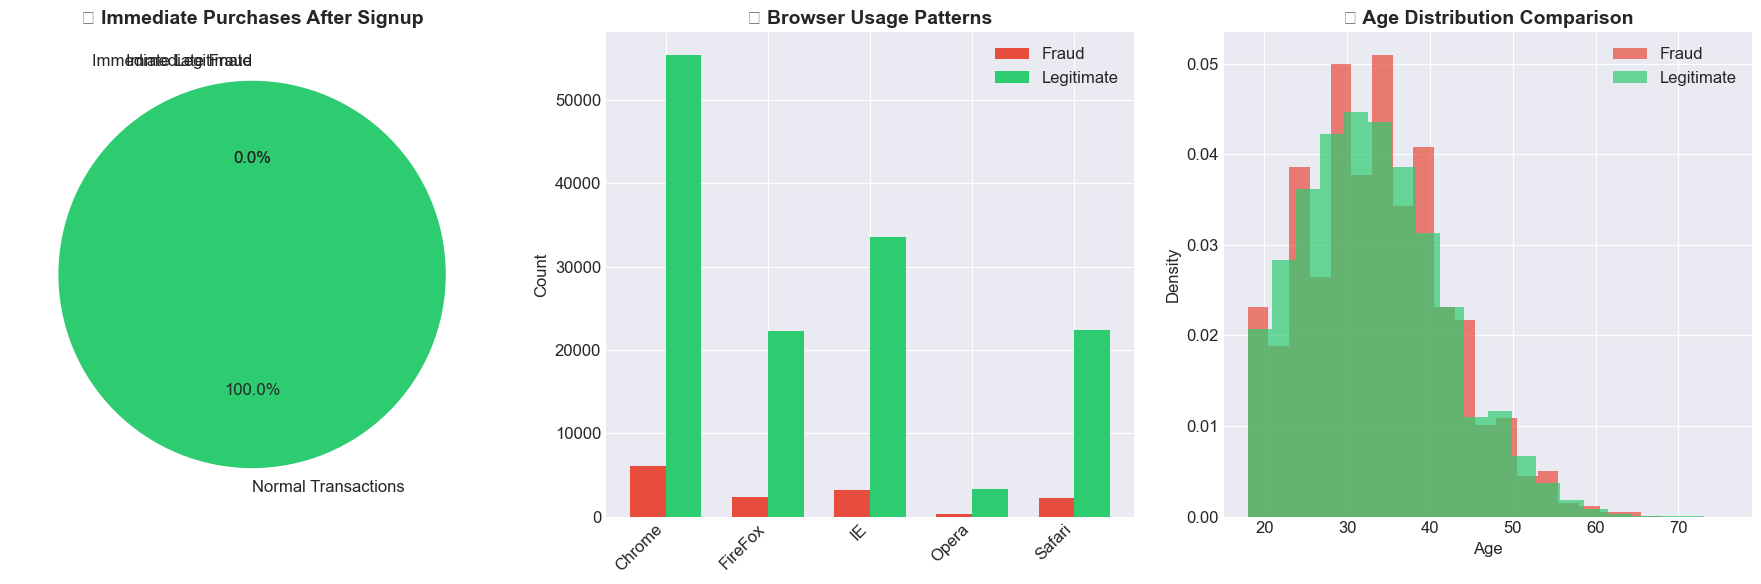

In [ ]:
# Create visualization for critical findings
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Immediate Purchase Analysis
if 'signup_time' in fraud_df.columns and 'purchase_time' in fraud_df.columns and 'class' in fraud_df.columns:
    immediate_mask = fraud_df['signup_time'] == fraud_df['purchase_time']
    fraud_immediate = fraud_df[immediate_mask & (fraud_df['class'] == 1)]
    legit_immediate = fraud_df[immediate_mask & (fraud_df['class'] == 0)]
    
    labels = ['Immediate Fraud', 'Immediate Legitimate', 'Normal Transactions']
    sizes = [
        len(fraud_immediate),
        len(legit_immediate),
        len(fraud_df) - len(fraud_immediate) - len(legit_immediate)
    ]
    colors = ['#E74C3C', '#F39C12', '#2ECC71']
    
    axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('🚨 Immediate Purchases After Signup', fontsize=14, fontweight='bold')
else:
    axes[0].text(0.5, 0.5, 'Data not available\nfor analysis', 
                 horizontalalignment='center', verticalalignment='center',
                 transform=axes[0].transAxes)
    axes[0].set_title('Immediate Purchases Analysis', fontsize=14, fontweight='bold')

# 2. Browser Usage Analysis
if 'browser' in fraud_df.columns and 'class' in fraud_df.columns:
    fraud_browsers = fraud_df[fraud_df['class'] == 1]['browser'].value_counts().head(5)
    legit_browsers = fraud_df[fraud_df['class'] == 0]['browser'].value_counts().head(5)
    
    if not fraud_browsers.empty and not legit_browsers.empty:
        browsers = sorted(set(fraud_browsers.index.tolist() + legit_browsers.index.tolist()))
        x = np.arange(len(browsers))
        width = 0.35
        
        fraud_counts = [fraud_browsers.get(browser, 0) for browser in browsers]
        legit_counts = [legit_browsers.get(browser, 0) for browser in browsers]
        
        axes[1].bar(x - width/2, fraud_counts, width, label='Fraud', color='#E74C3C')
        axes[1].bar(x + width/2, legit_counts, width, label='Legitimate', color='#2ECC71')
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(browsers, rotation=45, ha='right')
        axes[1].set_ylabel('Count')
    else:
        axes[1].text(0.5, 0.5, 'Insufficient data\nfor browser analysis', 
                     horizontalalignment='center', verticalalignment='center',
                     transform=axes[1].transAxes)
else:
    axes[1].text(0.5, 0.5, 'Browser/Class data\nnot available', 
                 horizontalalignment='center', verticalalignment='center',
                 transform=axes[1].transAxes)

axes[1].set_title('🌐 Browser Usage Patterns', fontsize=14, fontweight='bold')
axes[1].legend()

# 3. Age Distribution Comparison
if 'age' in fraud_df.columns and 'class' in fraud_df.columns:
    fraud_ages = fraud_df[fraud_df['class'] == 1]['age'].dropna()
    legit_ages = fraud_df[fraud_df['class'] == 0]['age'].dropna()
    
    if len(fraud_ages) > 0 and len(legit_ages) > 0:
        axes[2].hist(fraud_ages, bins=20, alpha=0.7, label='Fraud', color='#E74C3C', density=True)
        axes[2].hist(legit_ages, bins=20, alpha=0.7, label='Legitimate', color='#2ECC71', density=True)
        axes[2].set_xlabel('Age')
        axes[2].set_ylabel('Density')
    else:
        axes[2].text(0.5, 0.5, 'Insufficient age data\nfor comparison', 
                     horizontalalignment='center', verticalalignment='center',
                     transform=axes[2].transAxes)
else:
    axes[2].text(0.5, 0.5, 'Age/Class data\nnot available', 
                 horizontalalignment='center', verticalalignment='center',
                 transform=axes[2].transAxes)

axes[2].set_title('👥 Age Distribution Comparison', fontsize=14, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
print("="*80)
print("💡 BUSINESS INSIGHTS FROM INITIAL ANALYSIS")
print("="*80)

# Calculate key metrics
if 'class' in fraud_df.columns:
    fraud_rate = (fraud_df['class'].sum() / len(fraud_df)) * 100
else:
    fraud_rate = 0

if 'purchase_value' in fraud_df.columns:
    avg_purchase = fraud_df['purchase_value'].mean()
    median_purchase = fraud_df['purchase_value'].median()
else:
    avg_purchase = median_purchase = 0

print(f"\n📊 KEY METRICS:")
print(f"  • Overall Fraud Rate: {fraud_rate:.2f}%")
print(f"  • Average Purchase Value: ${avg_purchase:.2f}")
print(f"  • Median Purchase Value: ${median_purchase:.2f}")
print(f"  • Unique Users: {fraud_df['user_id'].nunique() if 'user_id' in fraud_df.columns else 'N/A':,}")
print(f"  • Unique Devices: {fraud_df['device_id'].nunique() if 'device_id' in fraud_df.columns else 'N/A':,}")

# Critical insights
print(f"\n🚨 CRITICAL INSIGHTS:")

# Insight 1: Immediate purchases
if 'signup_time' in fraud_df.columns and 'purchase_time' in fraud_df.columns and 'class' in fraud_df.columns:
    immediate_purchases = fraud_df[fraud_df['signup_time'] == fraud_df['purchase_time']]
    if len(immediate_purchases) > 0:
        fraud_immediate = immediate_purchases[immediate_purchases['class'] == 1]
        immediate_fraud_rate = (len(fraud_immediate) / len(immediate_purchases)) * 100 if len(immediate_purchases) > 0 else 0
        print(f"  1. Immediate purchases ({len(immediate_purchases)}) have {immediate_fraud_rate:.1f}% fraud rate")
        print(f"     → Recommendation: Flag transactions within 1 hour of signup")

# Insight 2: Browser patterns
if 'browser' in fraud_df.columns and 'class' in fraud_df.columns:
    fraud_browsers = fraud_df[fraud_df['class'] == 1]['browser'].value_counts()
    if not fraud_browsers.empty:
        top_fraud_browser = fraud_browsers.index[0]
        top_fraud_count = fraud_browsers.iloc[0]
        print(f"  2. Top fraud browser: {top_fraud_browser} ({top_fraud_count} cases)")
        print(f"     → Recommendation: Additional verification for {top_fraud_browser} users")

# Insight 3: Purchase value patterns
if 'purchase_value' in fraud_df.columns and 'class' in fraud_df.columns:
    high_value_fraud = fraud_df[(fraud_df['purchase_value'] > 500) & (fraud_df['class'] == 1)]
    if len(high_value_fraud) > 0:
        print(f"  3. High-value fraud detected: {len(high_value_fraud)} transactions > $500")
        print(f"     → Recommendation: Review threshold for high-value transactions")

# Insight 4: Time patterns
if 'time_since_signup_hours' in fraud_df.columns and 'class' in fraud_df.columns:
    fraud_time_data = fraud_df[fraud_df['class'] == 1]['time_since_signup_hours']
    legit_time_data = fraud_df[fraud_df['class'] == 0]['time_since_signup_hours']
    
    if len(fraud_time_data) > 0 and len(legit_time_data) > 0:
        fraud_time_avg = fraud_time_data.mean()
        legit_time_avg = legit_time_data.mean()
        if legit_time_avg > 0:
            print(f"  4. Fraud occurs {fraud_time_avg/legit_time_avg:.1f}x faster after signup")
            print(f"     → Recommendation: Implement velocity checks for new users")

💡 BUSINESS INSIGHTS FROM INITIAL ANALYSIS

📊 KEY METRICS:
  • Overall Fraud Rate: 9.36%
  • Average Purchase Value: $36.94
  • Median Purchase Value: $35.00
  • Unique Users: 151,112
  • Unique Devices: 137,956

🚨 CRITICAL INSIGHTS:
  2. Top fraud browser: Chrome (6069 cases)
     → Recommendation: Additional verification for Chrome users
  4. Fraud occurs 0.5x faster after signup
     → Recommendation: Implement velocity checks for new users


In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import json
import matplotlib.pyplot as plt

# Define base directories
BASE_DIR = "D:/10 acadamy/fraud-detection-ml-system"
DATA_PROCESSED_DIR = os.path.join(BASE_DIR, "data/processed")
OUTPUTS_DIR = os.path.join(BASE_DIR, "outputs/Data_Analysis_processing")
REPORTS_DIR = os.path.join(OUTPUTS_DIR, "reports")
STATISTICS_DIR = os.path.join(OUTPUTS_DIR, "statistics")
VISUALIZATIONS_DIR = os.path.join(OUTPUTS_DIR, "visualizations")

# Create directories if they don't exist
os.makedirs(DATA_PROCESSED_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(STATISTICS_DIR, exist_ok=True)
os.makedirs(VISUALIZATIONS_DIR, exist_ok=True)

# Generate timestamp for filenames
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# STEP 1: LOAD YOUR EXISTING DATA
print("📥 Loading existing processed data...")

# Check what files are available in data/processed/
available_files = os.listdir(DATA_PROCESSED_DIR)
print(f"Available files in {DATA_PROCESSED_DIR}:")
for file in available_files:
    if file.endswith('.csv'):
        print(f"  • {file}")

# Load the most recent files
# 1. Load fraud data
fraud_files = [f for f in available_files if 'fraud' in f.lower() and f.endswith('.csv')]
if fraud_files:
    # Get the latest fraud file
    fraud_files.sort(reverse=True)
    fraud_file_path = os.path.join(DATA_PROCESSED_DIR, fraud_files[0])
    fraud_df = pd.read_csv(fraud_file_path)
    print(f"  ✅ Loaded fraud data: {fraud_files[0]} ({len(fraud_df)} rows)")
else:
    print("  ❌ No fraud data files found")
    fraud_df = pd.DataFrame()

# 2. Load credit card data
credit_files = [f for f in available_files if ('credit' in f.lower() or 'card' in f.lower()) and f.endswith('.csv')]
if credit_files:
    credit_files.sort(reverse=True)
    credit_file_path = os.path.join(DATA_PROCESSED_DIR, credit_files[0])
    credit_df = pd.read_csv(credit_file_path)
    print(f"  ✅ Loaded credit card data: {credit_files[0]} ({len(credit_df)} rows)")
else:
    print("  ❌ No credit card data files found")
    credit_df = pd.DataFrame()

# 3. Load IP mapping data
ip_files = [f for f in available_files if 'ip' in f.lower() and f.endswith('.csv')]
if ip_files:
    ip_files.sort(reverse=True)
    ip_file_path = os.path.join(DATA_PROCESSED_DIR, ip_files[0])
    ip_df = pd.read_csv(ip_file_path)
    print(f"  ✅ Loaded IP mapping data: {ip_files[0]} ({len(ip_df)} rows)")
else:
    print("  ❌ No IP mapping files found")
    ip_df = pd.DataFrame()

# STEP 2: CLEAN THE DATA (if needed)
print("\n🧹 Cleaning data...")

# Clean fraud data
if not fraud_df.empty:
    fraud_df_cleaned = fraud_df.copy()
    
    # Basic cleaning steps
    initial_rows = len(fraud_df_cleaned)
    
    # Remove duplicates
    fraud_df_cleaned = fraud_df_cleaned.drop_duplicates()
    duplicates_removed = initial_rows - len(fraud_df_cleaned)
    
    # Handle missing values (example - adjust based on your data)
    if fraud_df_cleaned.isnull().sum().sum() > 0:
        # For numeric columns, fill with median
        numeric_cols = fraud_df_cleaned.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if fraud_df_cleaned[col].isnull().any():
                fraud_df_cleaned[col] = fraud_df_cleaned[col].fillna(fraud_df_cleaned[col].median())
        
        # For categorical columns, fill with mode
        categorical_cols = fraud_df_cleaned.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            if fraud_df_cleaned[col].isnull().any():
                fraud_df_cleaned[col] = fraud_df_cleaned[col].fillna(fraud_df_cleaned[col].mode()[0] if not fraud_df_cleaned[col].mode().empty else 'Unknown')
    
    print(f"  ✅ Fraud data cleaned: Removed {duplicates_removed} duplicates")
else:
    fraud_df_cleaned = pd.DataFrame()
    print("  ⚠️ No fraud data to clean")

# Clean credit card data
if not credit_df.empty:
    credit_df_cleaned = credit_df.copy()
    
    initial_rows = len(credit_df_cleaned)
    credit_df_cleaned = credit_df_cleaned.drop_duplicates()
    duplicates_removed = initial_rows - len(credit_df_cleaned)
    
    # Handle missing values
    if credit_df_cleaned.isnull().sum().sum() > 0:
        numeric_cols = credit_df_cleaned.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if credit_df_cleaned[col].isnull().any():
                credit_df_cleaned[col] = credit_df_cleaned[col].fillna(credit_df_cleaned[col].median())
    
    print(f"  ✅ Credit card data cleaned: Removed {duplicates_removed} duplicates")
else:
    credit_df_cleaned = pd.DataFrame()
    print("  ⚠️ No credit card data to clean")

# STEP 3: SAVE CLEANED DATA
print("\n💾 Saving processed data files...")

# 1. Save cleaned fraud data
if not fraud_df_cleaned.empty:
    fraud_cleaned_filename = f"fraud_data_cleaned_{timestamp}.csv"
    fraud_cleaned_path = os.path.join(DATA_PROCESSED_DIR, fraud_cleaned_filename)
    fraud_cleaned_latest_path = os.path.join(DATA_PROCESSED_DIR, "fraud_data_cleaned.csv")

    fraud_df_cleaned.to_csv(fraud_cleaned_path, index=False)
    fraud_df_cleaned.to_csv(fraud_cleaned_latest_path, index=False)
    print(f"  ✅ Fraud data saved: {fraud_cleaned_filename}")
    print(f"  ✅ Latest fraud data saved: fraud_data_cleaned.csv")
else:
    print("  ⚠️ Skipping fraud data save - no data available")

# 2. Save cleaned credit card data
if not credit_df_cleaned.empty:
    credit_cleaned_filename = f"creditcard_cleaned_{timestamp}.csv"
    credit_cleaned_path = os.path.join(DATA_PROCESSED_DIR, credit_cleaned_filename)
    credit_cleaned_latest_path = os.path.join(DATA_PROCESSED_DIR, "creditcard_cleaned.csv")

    credit_df_cleaned.to_csv(credit_cleaned_path, index=False)
    credit_df_cleaned.to_csv(credit_cleaned_latest_path, index=False)
    print(f"  ✅ Credit card data saved: {credit_cleaned_filename}")
    print(f"  ✅ Latest credit card data saved: creditcard_cleaned.csv")
else:
    print("  ⚠️ Skipping credit card data save - no data available")

# 3. Save IP country mapping
if not ip_df.empty:
    ip_mapping_filename = f"ip_country_mapping_{timestamp}.csv"
    ip_mapping_path = os.path.join(DATA_PROCESSED_DIR, ip_mapping_filename)
    ip_mapping_latest_path = os.path.join(DATA_PROCESSED_DIR, "ip_country_mapping.csv")

    ip_df.to_csv(ip_mapping_path, index=False)
    ip_df.to_csv(ip_mapping_latest_path, index=False)
    print(f"  ✅ IP country mapping saved: {ip_mapping_filename}")
    print(f"  ✅ Latest IP mapping saved: ip_country_mapping.csv")
else:
    print("  ⚠️ Skipping IP mapping save - no data available")

# STEP 4: GENERATE AND SAVE REPORTS
print("\n📊 Generating and saving reports...")

# Create validation summary (simplified since we don't have validation results)
validation_report = {
    "timestamp": timestamp,
    "datasets_processed": {
        "fraud_data": {
            "available": not fraud_df.empty,
            "rows_original": len(fraud_df) if not fraud_df.empty else 0,
            "rows_cleaned": len(fraud_df_cleaned) if not fraud_df_cleaned.empty else 0,
            "columns": len(fraud_df_cleaned.columns) if not fraud_df_cleaned.empty else 0,
            "duplicates_removed": len(fraud_df) - len(fraud_df_cleaned) if not fraud_df.empty and not fraud_df_cleaned.empty else 0
        },
        "credit_data": {
            "available": not credit_df.empty,
            "rows_original": len(credit_df) if not credit_df.empty else 0,
            "rows_cleaned": len(credit_df_cleaned) if not credit_df_cleaned.empty else 0,
            "columns": len(credit_df_cleaned.columns) if not credit_df_cleaned.empty else 0,
            "duplicates_removed": len(credit_df) - len(credit_df_cleaned) if not credit_df.empty and not credit_df_cleaned.empty else 0
        },
        "ip_mapping": {
            "available": not ip_df.empty,
            "rows": len(ip_df) if not ip_df.empty else 0
        }
    },
    "output_files": {
        "data_processed_dir": DATA_PROCESSED_DIR,
        "reports_dir": REPORTS_DIR,
        "statistics_dir": STATISTICS_DIR,
        "visualizations_dir": VISUALIZATIONS_DIR
    }
}

# Save JSON report
report_filename = f"data_processing_report_{timestamp}.json"
report_path = os.path.join(REPORTS_DIR, report_filename)
report_latest_path = os.path.join(REPORTS_DIR, "data_processing_report_latest.json")

with open(report_path, 'w') as f:
    json.dump(validation_report, f, indent=4)
with open(report_latest_path, 'w') as f:
    json.dump(validation_report, f, indent=4)
print(f"  ✅ Processing report saved: {report_filename}")
print(f"  ✅ Latest processing report saved: data_processing_report_latest.json")

# Save dataset statistics
if not fraud_df_cleaned.empty or not credit_df_cleaned.empty:
    statistics_filename = f"dataset_statistics_{timestamp}.txt"
    statistics_path = os.path.join(STATISTICS_DIR, statistics_filename)
    statistics_latest_path = os.path.join(STATISTICS_DIR, "dataset_statistics_latest.txt")

    with open(statistics_path, 'w') as f:
        f.write("="*60 + "\n")
        f.write("DATASET STATISTICS\n")
        f.write("="*60 + "\n\n")
        
        if not fraud_df_cleaned.empty:
            f.write("FRAUD DATASET STATISTICS:\n")
            f.write("-"*40 + "\n")
            f.write(f"Rows: {len(fraud_df_cleaned)}\n")
            f.write(f"Columns: {len(fraud_df_cleaned.columns)}\n")
            f.write(f"Missing values: {fraud_df_cleaned.isnull().sum().sum()}\n")
            f.write(f"Memory usage: {fraud_df_cleaned.memory_usage(deep=True).sum() / (1024*1024):.2f} MB\n")
            
            # Show column data types
            f.write("\nColumn Data Types:\n")
            for col in fraud_df_cleaned.columns:
                dtype = str(fraud_df_cleaned[col].dtype)
                f.write(f"  • {col}: {dtype}\n")
        
        if not credit_df_cleaned.empty:
            f.write("\n" + "="*60 + "\n\n")
            f.write("CREDIT CARD DATASET STATISTICS:\n")
            f.write("-"*40 + "\n")
            f.write(f"Rows: {len(credit_df_cleaned)}\n")
            f.write(f"Columns: {len(credit_df_cleaned.columns)}\n")
            f.write(f"Missing values: {credit_df_cleaned.isnull().sum().sum()}\n")
            f.write(f"Memory usage: {credit_df_cleaned.memory_usage(deep=True).sum() / (1024*1024):.2f} MB\n")

    with open(statistics_latest_path, 'w') as f:
        with open(statistics_path, 'r') as src:
            f.write(src.read())
    print(f"  ✅ Dataset statistics saved: {statistics_filename}")
    print(f"  ✅ Latest statistics saved: dataset_statistics_latest.txt")

# STEP 5: CREATE AND SAVE VISUALIZATIONS
print("\n🎨 Creating and saving visualizations...")

try:
    # Create basic visualizations
    if not fraud_df_cleaned.empty:
        # 1. Class distribution plot (if class column exists)
        if 'class' in fraud_df_cleaned.columns:
            plt.figure(figsize=(10, 6))
            class_counts = fraud_df_cleaned['class'].value_counts()
            colors = ['green', 'red']
            labels = ['Legitimate (0)', 'Fraud (1)']
            
            plt.bar(labels, class_counts.values, color=colors)
            plt.title('Fraud Dataset Class Distribution', fontsize=14, fontweight='bold')
            plt.xlabel('Class', fontsize=12)
            plt.ylabel('Count', fontsize=12)
            
            # Add count labels on bars
            for i, count in enumerate(class_counts.values):
                plt.text(i, count + max(class_counts.values)*0.01, str(count), 
                        ha='center', va='bottom', fontsize=11, fontweight='bold')
            
            plt.tight_layout()
            class_plot_filename = f"fraud_class_distribution_{timestamp}.png"
            class_plot_path = os.path.join(VISUALIZATIONS_DIR, class_plot_filename)
            plt.savefig(class_plot_path, dpi=150, bbox_inches='tight')
            plt.close()
            print(f"  ✅ Class distribution plot saved: {class_plot_filename}")
        
        # 2. Missing values heatmap
        if fraud_df_cleaned.isnull().sum().sum() > 0:
            plt.figure(figsize=(12, 8))
            plt.imshow(fraud_df_cleaned.isnull().T, cmap='viridis', aspect='auto')
            plt.colorbar(label='Missing (Yellow) / Present (Purple)')
            plt.title('Missing Values Heatmap - Fraud Data', fontsize=14, fontweight='bold')
            plt.xlabel('Row Index')
            plt.ylabel('Columns')
            plt.yticks(range(len(fraud_df_cleaned.columns)), fraud_df_cleaned.columns, fontsize=8)
            
            missing_plot_filename = f"fraud_missing_values_{timestamp}.png"
            missing_plot_path = os.path.join(VISUALIZATIONS_DIR, missing_plot_filename)
            plt.savefig(missing_plot_path, dpi=150, bbox_inches='tight')
            plt.close()
            print(f"  ✅ Missing values heatmap saved: {missing_plot_filename}")
    
    if not credit_df_cleaned.empty:
        # Create correlation heatmap for numeric columns (if many numeric columns)
        numeric_cols = credit_df_cleaned.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 5:  # Only if we have enough numeric columns
            # Take first 10 numeric columns to avoid huge plots
            cols_to_plot = numeric_cols[:10]
            corr_matrix = credit_df_cleaned[cols_to_plot].corr()
            
            plt.figure(figsize=(12, 10))
            plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
            plt.colorbar(label='Correlation')
            plt.title('Correlation Heatmap - Credit Card Data (First 10 Numeric Columns)', 
                     fontsize=14, fontweight='bold')
            plt.xticks(range(len(cols_to_plot)), cols_to_plot, rotation=45, ha='right', fontsize=9)
            plt.yticks(range(len(cols_to_plot)), cols_to_plot, fontsize=9)
            
            # Add correlation values
            for i in range(len(cols_to_plot)):
                for j in range(len(cols_to_plot)):
                    plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                            ha='center', va='center', color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black',
                            fontsize=8)
            
            plt.tight_layout()
            corr_plot_filename = f"credit_correlation_heatmap_{timestamp}.png"
            corr_plot_path = os.path.join(VISUALIZATIONS_DIR, corr_plot_filename)
            plt.savefig(corr_plot_path, dpi=150, bbox_inches='tight')
            plt.close()
            print(f"  ✅ Correlation heatmap saved: {corr_plot_filename}")
            
except Exception as e:
    print(f"  ⚠️ Could not create visualizations: {e}")

# STEP 6: PRINT SUMMARY
print("\n" + "="*60)
print("✅ DATA PROCESSING COMPLETE!")
print("="*60)

print(f"\n📁 Output Directories:")
print(f"  • Clean data (for ML): {DATA_PROCESSED_DIR}")
print(f"  • Reports: {REPORTS_DIR}")
print(f"  • Statistics: {STATISTICS_DIR}")
print(f"  • Visualizations: {VISUALIZATIONS_DIR}")

print(f"\n📄 Files created in this run:")
print(f"  Data files in {DATA_PROCESSED_DIR}:")
new_files = [f for f in os.listdir(DATA_PROCESSED_DIR) if timestamp in f]
for file in sorted(new_files):
    file_path = os.path.join(DATA_PROCESSED_DIR, file)
    if os.path.exists(file_path):
        file_size = os.path.getsize(file_path) / (1024 * 1024)  # Convert to MB
        print(f"    • {file} ({file_size:.2f} MB)")

print(f"\n  Report files in {REPORTS_DIR}:")
new_reports = [f for f in os.listdir(REPORTS_DIR) if timestamp in f]
for file in sorted(new_reports):
    print(f"    • {file}")

print(f"\n  Visualization files in {VISUALIZATIONS_DIR}:")
new_viz = [f for f in os.listdir(VISUALIZATIONS_DIR) if timestamp in f]
for file in sorted(new_viz):
    print(f"    • {file}")

print("\n📊 Dataset Summary:")
if not fraud_df_cleaned.empty:
    print(f"  • Fraud Data: {len(fraud_df_cleaned)} rows, {len(fraud_df_cleaned.columns)} columns")
if not credit_df_cleaned.empty:
    print(f"  • Credit Card Data: {len(credit_df_cleaned)} rows, {len(credit_df_cleaned.columns)} columns")
if not ip_df.empty:
    print(f"  • IP Mapping Data: {len(ip_df)} rows, {len(ip_df.columns)} columns")

print("\n🎯 Next steps:")
print("  1. Use the cleaned data for model training")
print("  2. Check the reports for data quality insights")
print("  3. Review visualizations for data patterns")

📥 Loading existing processed data...
Available files in D:/10 acadamy/fraud-detection-ml-system\data/processed:
  • creditcard_cleaned.csv
  • creditcard_cleaned_20251219_103703.csv
  • creditcard_data_processed_20251218_173255.csv
  • creditcard_data_processed_latest.csv
  • fraud_data_cleaned.csv
  • fraud_data_cleaned_20251219_103703.csv
  • fraud_data_processed_20251218_173255.csv
  • fraud_data_processed_latest.csv
  • fraud_with_country_20251219_123003.csv
  • fraud_with_country_20251219_144637.csv
  • fraud_with_country_20251219_152202.csv
  • ip_country_data_processed_20251218_173255.csv
  • ip_country_data_processed_latest.csv
  • ip_country_mapping.csv
  • ip_country_mapping_20251219_103703.csv
  ✅ Loaded fraud data: fraud_with_country_20251219_152202.csv (151112 rows)
  ✅ Loaded credit card data: creditcard_data_processed_latest.csv (284807 rows)
  ✅ Loaded IP mapping data: ip_country_mapping_20251219_103703.csv (138846 rows)

🧹 Cleaning data...
  ✅ Fraud data cleaned: Remov